# Abstracting Data with RDDs

## Introduction:

#### What are RDDs?

RDDs are called __Resilient Distributed Datasets__, where these are a collection of immutable JVM objects that are distributed across an Apache Spark Cluster. It is also the most fundamental dataset type for Apache Spark, whereby actions that are on a Spark DataFrame will get translated into highly optimised execution of transformations and actions on RDDs. 

The data would be split up into chunks based on a key and subsequently dispersed to all the executor nodes. The advantages of RDDs are its high resilience and ability to be recovered quickly as the same data chunks are replicated across multiple executor nodes. It also allows functional calculations on all the dataset quickly using mulitple nodes. Further, RDDs keep a log of the execution steps that were applied to each chunk which also combat against data lost by execution error. 

__This notebook will then go through the basics of using PySpark__.

## 1 PySpark Machine Configuration:

Here it only uses two processing cores from the CPU, and it set up by the following code.

In [1]:
%%configure
{
    "executorCores" : 2
}

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,None,pyspark,idle,,,


In [2]:
from pyspark.sql.types import *

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,None,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 2 Creating RDDs:

There are two ways to do this:
- 1) Use the "parallelize()" method, a collection of lists or array of some elements.
- 2) Reference a file(s) that are located either locally or from an external source.

Here, the (1) method creates aparallelised collection where it would allow Spark to distribute the data to all the executor nodes and operate on it in parallel. For example, an operations done in parallel can be the "reduceByKey(add)" method applied as "myRDD.reduceByKey(add)".

The ".take()" method returns the values of the RDD to the console. Please note that the more common approach in PySpark is to use ".collect()" moethod. However, this may prove to be taxing on most systems if the dataset is huge. The best way to use the ".take()" method as it is more efficient.

In [3]:
# Example to Creating a RDDs:
myRDD = sc.parallelize( [('Mike', 19), ('June', 18), 
                         ('Rachel', 16), ('Rob', 18),
                        ('Scott', 17)] )


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# Inspect: to view what is inside an RDD.
myRDD.take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Mike', 19), ('June', 18), ('Rachel', 16), ('Rob', 18), ('Scott', 17)]

## 3 Reading Data From Files:

Here, a CSV file will be read and the datasets can be found in the "Dataset" folder that is avaible with this notebook download.

The Datasets are:
- 1) airport-codes.txt
- 2) departure_delays.csv

Source:
- https://openflights.org/data.html
- https://catalog.data.gov/dataset/airline-on-time-performance-and-causes-of-flight-delays-on-time-data

NOTE: Make sure your Current Working Directory is correct.

In [5]:
import os

# Change the Path:
path = '/Users/y.s.lee/OneDrive/Packt - PySpark Cookbook/Project 2 - Abstracting Data with RDDs/'
# path = '++++your working directory here++++/Datasets/'
os.chdir(path + 'Datasets/')
folder_pathway = os.getcwd()

# print(folder_pathway)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
# Load in the dataset: airport-codes.txt
myRDD = (
    sc.textFile(folder_pathway + '/airport-codes.txt',
                minPartitions=4,
                use_unicode=True
    ).map(lambda element: element.split("\t"))
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### What is happening here?

After defining the pathway to the "Datasets" folder, there are two additional parameters added which are:
- "minPartitions" that defines the number of partitions that make up the RDD, often without specifying this, the Spark engine will determine the best number based on file size. The user can set this partition value based on performance reasons.
- "use_unicode" ensures the processing is in Unicode.

Finally, there is a ".map()" function, where it would transform the data from a list of strings to a lists of lists. There are also a lambda function used for mapping the transformation. This uses PySparks's split function to split the string according to the delimiter which is a tab. ("\t").

In [7]:
# Inspect: 
myRDD.take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['City', 'State', 'Country', 'IATA'], ['Abbotsford', 'BC', 'Canada', 'YXX'], ['Aberdeen', 'SD', 'USA', 'ABR'], ['Abilene', 'TX', 'USA', 'ABI'], ['Akron', 'OH', 'USA', 'CAK']]

In [8]:
# Count the number of rows in the RDD:
myRDD.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

527

In [9]:
# Determine the number of partitions that support the RDD:
myRDD.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

4

#### Setting the number of partitions when creating an RDD:

The important aspect of using/setting the number of partitions on the RDD is that the more partitions set, the higher the parallelism, which may improve performance of query.

## 3.1 Using a Larger Dataset:

Here, the dataset used will be the "departure_delays.csv" file.

In [10]:
# Load in the dataset: departure_delays.csv
myRDD = (
    sc.textFile(folder_pathway + '/departure_delays.csv').map(lambda element: element.split("\t"))
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# Count the number of rows in the RDD: this took about 2 secs.
myRDD.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1391579

In [12]:
# Determine the number of partitions that support the RDD:
myRDD.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1

#### Let's see how increasing the number of partitions can help the overall performance.

In [13]:
# Load in the dataset: airport-codes.txt
myRDD = (
    sc.textFile(folder_pathway + '/departure_delays.csv',
                minPartitions=8
    ).map(lambda element: element.split("\t"))
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# Count the number of rows in the RDD: slightly faster than 2 secs.
myRDD.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1391579

In [15]:
# Determine the number of partitions that support the RDD:
myRDD.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8

## 4 More on RDD Transformations:

Commonly, there are two types of operations that can be used on the RDD and these are:
- Transformations, this transforms one RDD into another (like one or more output RDDs), these are only executed when the action is called on a RDD.
- Actions, unlike transformations will return the raw values.

## 4.1 Save the datasets into RDDs:

In [16]:
# Save the data to the RDD: airports
airports = (
    sc.textFile(folder_pathway + '/airport-codes.txt').map(lambda element: element.split("\t"))
)

# Save the data to the RDD: flights
flights = (
    sc.textFile(folder_pathway + '/departure_delays.csv').map(lambda element: element.split(","))
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
# Inspect: 
airports.take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['City', 'State', 'Country', 'IATA'], ['Abbotsford', 'BC', 'Canada', 'YXX'], ['Aberdeen', 'SD', 'USA', 'ABR'], ['Abilene', 'TX', 'USA', 'ABI'], ['Akron', 'OH', 'USA', 'CAK']]

In [18]:
# Inspect: 
flights.take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['date', 'delay', 'distance', 'origin', 'destination'], ['01011245', '6', '602', 'ABE', 'ATL'], ['01020600', '-8', '369', 'ABE', 'DTW'], ['01021245', '-2', '602', 'ABE', 'ATL'], ['01020605', '-4', '602', 'ABE', 'ATL']]

## 4.2 Transformation type: .map()

This .map(func) function will perform a transformation on the current RDD and returns a new RDD by passing each of the elements through a function "func".

In [19]:
# Extract the first two columns:
airports.map(lambda c: (c[0], c[1])).take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('City', 'State'), ('Abbotsford', 'BC'), ('Aberdeen', 'SD'), ('Abilene', 'TX'), ('Akron', 'OH')]

## 4.3 Transformation type: .filter()

This .filter(func) function will perform a transformation on the current RDD and returns a new RDD based on selecting the elements where the function "func" returns True.

In [20]:
# Filter for the 2nd column == "WA"
(
    airports
    .map(lambda c: (c[0], c[1]))
    .filter(lambda c: c[1] == "WA")
    .take(5)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Bellingham', 'WA'), ('Moses Lake', 'WA'), ('Pasco', 'WA'), ('Pullman', 'WA'), ('Seattle', 'WA')]

## 4.4 Transformation type: .flatMap()

The .flatMap(func) function would be similar to map, however, the new RDD flattens out all the elements.

In [21]:
# Filter for the 2nd column == "WA", selects the first 2 columns within the RDD and proceeds to flatten out the values:
(
    airports
    .filter(lambda c: c[1] == "WA")
    .map(lambda c: (c[0], c[1]))
    .flatMap(lambda x: x)
    .take(10)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Bellingham', 'WA', 'Moses Lake', 'WA', 'Pasco', 'WA', 'Pullman', 'WA', 'Seattle', 'WA']

## 4.5 Transformation type: .distinct() 

The distinct() function returns a transformed new RDD that contains the distinct elements of the original RDD.

In [22]:
# Return the distinct elements for the 3rd column that is the countries data.
(
    airports
    .map(lambda c: c[2])
    .distinct()
    .take(5)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Country', 'Canada', 'USA']

## 4.6 Transformation type: .sample()

The sample(WithReplacement, fraction, seed) function will sample a fraction of the data, either with or without replacement based on random seed. 

In [23]:
# Provide a sample based on 0.001% of the flights RDD data that is specific to the 4th column (original city of the flight) without replacement (False) using random seed of 101.
(
    flights
    .map(lambda c: c[3])
    .sample(False, 0.001, 123)
    .take(5)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['ABQ', 'AEX', 'AGS', 'ANC', 'ATL']

## 4.7 Transformation type: .join()

The join(RDD') function transforms and returns a RDD of (key, (val_left, val_right)) when calling the RDD (key, val_left) and RDD (key, val_right), where the Outer joins are supported by left outer join, right outer join and full outer join.

In [24]:
# Get Flight Data -> ('JFK', 01010900)
flt = flights.map(lambda c: (c[3], c[0]))

# Get Airport Data -> ('JFK', 'NY')

airp = airports.map(lambda c: (c[3], c[1]))

# Perform the inner join method between the RDDs:
flt.join(airp).take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('ABE', ('01011245', 'PA')), ('ABE', ('01020600', 'PA')), ('ABE', ('01021245', 'PA')), ('ABE', ('01020605', 'PA')), ('ABE', ('01031245', 'PA'))]

## 4.8 Transformation type: .repartition()

The repartition(n) will repartition the RDD into 'n' partitions, this is done randomly by reshuffling and uniformly redistributing the data across the network. This should help to improve performance.

In [25]:
# Check the original RDD partitions:
flights.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1

In [26]:
# Repartition the RDD: to 2 partitions.
flights2 = flights.repartition(2)

# Check the RDD partitions:
flights2.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2

In [27]:
# Repartition the RDD: to 2 partitions.
flights8 = flights.repartition(8)

# Check the RDD partitions:
flights8.getNumPartitions()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8

## 4.9 Transformation type: .zipWithIndex()

The zipWithIndex() function will append (Zips) the RDD with the elemnet indices.

In [28]:
# Preview each row within the RDD and its Index:
zip_air = airports.map(lambda c: (c[0], c[3]))

# Inspect:
zip_air.zipWithIndex().take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(('City', 'IATA'), 0), (('Abbotsford', 'YXX'), 1), (('Aberdeen', 'ABR'), 2), (('Abilene', 'ABI'), 3), (('Akron', 'CAK'), 4)]

To remove the header from the data:

New changes to Python 3: https://www.python.org/dev/peps/pep-3113/

In [29]:
# Previously:
# (
#     zip_air
#     .zipWithIndex()
#     .filter(lambda (row, idx): idx > 0)
#     .map(lambda (row, idx): row)
#     .take(5)
# )

# NEW:
# Using the zipWithIndex function to skip the header row. -> filter out row 0 (column HEADER) and extract only row info.
(
    zip_air
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0)
    .map(lambda row_idx: row_idx[0])
    .take(5)
)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Abbotsford', 'YXX'), ('Aberdeen', 'ABR'), ('Abilene', 'ABI'), ('Akron', 'CAK'), ('Alamosa', 'ALS')]

## 4.10 Transformation type: .reduceByKey()

The reduceByKey(f) function reduces the elements of the RDD by using "f" as the key. So the "f" function shoule be commutative and associative in order to be computed correctly and in parallel.

In [30]:
# Determine the delays in regards to originating city. -> remove header row with zipWithIndex() and map()

(
    flights
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0)
    .map(lambda row_idx: row_idx[0])
    .map(lambda c: (c[3], int(c[1]) ) )
    .reduceByKey(lambda x, y: x + y) # Take the count of the previous delay (x) and add it with the next delay count (y), gives total delays.
    .take(20)
)




FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('ABE', 5113), ('ABI', 5128), ('ABQ', 64422), ('ABY', 1554), ('ACT', 392), ('ACV', 8429), ('ADQ', -254), ('AEX', 10193), ('AGS', 5003), ('ALB', 22362), ('ALO', 2866), ('AMA', 21979), ('ANC', 4948), ('ATL', 1151087), ('ATW', 8151), ('AUS', 108638), ('AVL', 5727), ('AVP', 2946), ('AZO', 233), ('BDL', 54662)]

## 4.11 Transformation type: .sortByKey()

The sortByKey(asc) will order (key, value) pairs within the RDD by key and returns a transformed RDD in ascending or descending order.

In [31]:
# Gets the origin code and delays, proceeds to remove the header, then runs a group by origin code via reduceByKey(), and finally sorting it by the key (origin code):
(
    flights
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0 ).map(lambda row_idx: row_idx[0])
    .map(lambda c: (c[3], int(c[1])))
    .reduceByKey(lambda x, y: x + y)
    .sortByKey()
    .take(50)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('ABE', 5113), ('ABI', 5128), ('ABQ', 64422), ('ABY', 1554), ('ACT', 392), ('ACV', 8429), ('ADQ', -254), ('AEX', 10193), ('AGS', 5003), ('ALB', 22362), ('ALO', 2866), ('AMA', 21979), ('ANC', 4948), ('ATL', 1151087), ('ATW', 8151), ('AUS', 108638), ('AVL', 5727), ('AVP', 2946), ('AZO', 233), ('BDL', 54662), ('BET', -645), ('BFL', 4022), ('BGR', 2852), ('BHM', 44355), ('BIL', 2616), ('BIS', 3825), ('BMI', 7817), ('BNA', 212243), ('BOI', 18004), ('BOS', 238602), ('BPT', 1936), ('BQK', 3952), ('BQN', 3943), ('BRO', 4967), ('BRW', 880), ('BTM', -138), ('BTR', 21989), ('BTV', 14755), ('BUF', 54309), ('BUR', 42241), ('BWI', 362845), ('BZN', 7226), ('CAE', 25686), ('CAK', 14749), ('CDC', 51), ('CDV', -1024), ('CEC', 2832), ('CHA', 7586), ('CHO', 2421), ('CHS', 30789)]

## 4.12 Transformation type: .union()

The union(RDD) returns a tranformed RDD that is the union of the source and argument RDDs.

In [32]:
# Make 'part_a' RDD of the Washington Airports:
part_a = (
    airports
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0)
    .map(lambda row_idx: row_idx[0])
    .filter(lambda c: c[1] == "WA")
)

# Make 'part_b' RDD of the British Columbia Airports:
part_b = (
    airports
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0)
    .map(lambda row_idx: row_idx[0])
    .filter(lambda c: c[1] == "BC")
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
# Perform the Union:
part_a.union(part_b).collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['Bellingham', 'WA', 'USA', 'BLI'], ['Moses Lake', 'WA', 'USA', 'MWH'], ['Pasco', 'WA', 'USA', 'PSC'], ['Pullman', 'WA', 'USA', 'PUW'], ['Seattle', 'WA', 'USA', 'SEA'], ['Spokane', 'WA', 'USA', 'GEG'], ['Walla Walla', 'WA', 'USA', 'ALW'], ['Wenatchee', 'WA', 'USA', 'EAT'], ['Yakima', 'WA', 'USA', 'YKM'], ['Abbotsford', 'BC', 'Canada', 'YXX'], ['Anahim Lake', 'BC', 'Canada', 'YAA'], ['Campbell River', 'BC', 'Canada', 'YBL'], ['Castlegar', 'BC', 'Canada', 'YCG'], ['Cranbrook', 'BC', 'Canada', 'YXC'], ['Fort Nelson', 'BC', 'Canada', 'YYE'], ['Fort Saint John', 'BC', 'Canada', 'YXJ'], ['Kamloops', 'BC', 'Canada', 'YKA'], ['Kelowna', 'BC', 'Canada', 'YLW'], ['Nanaimo', 'BC', 'Canada', 'YCD'], ['Penticton', 'BC', 'Canada', 'YYF'], ['Port Hardy', 'BC', 'Canada', 'YZT'], ['Powell River', 'BC', 'Canada', 'YPW'], ['Prince George', 'BC', 'Canada', 'YXS'], ['Prince Rupert', 'BC', 'Canada', 'YPR'], ['Quesnel', 'BC', 'Canada', 'YQZ'], ['"Sandspit, Queen Charlotte Islands"', 'BC', 'Canada', 'YZP'], 

## 4.13 Transformation type: .mapPartitionsWithIndex()

The mapPartitionsWithIndex(f) can be said to be similar to the map function, however it runs the "f" function separately on each of the partition and provides an index of the partition. 

This is useful when trying to determine the data skew within each of the partitions.

In [34]:
# Uder defince Function: 
def partitionElementCount(idx, iterator):
    count = 0
    for _ in iterator:
        count += 1
    return idx, count

# Apply the function above:
flights.mapPartitionsWithIndex(partitionElementCount).collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0, 1391579]

## 4.14 Inspecting and understanding whats happening behind the scenes of a Spark Session:

Every Spark session will launch a web-based UI and by default it would be on http://localhost:4040.
Opening this link would show the following:

- A list of scheduler stages and its tasks.
- Summary of the RDD sizes and its memory usage.
- Environmental Information.
- Information about the running executors.

Further information and details can be found on: https://spark.apache.org/docs/latest/monitoring.html.

## 4.15 Example code for DAG visualisation:

In [35]:
flt = flights.map(lambda c: (c[3], c[0]))

airp = airports.map(lambda c: (c[3], c[1]))

flt.join(airp).take(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('ABE', ('01011245', 'PA')), ('ABE', ('01020600', 'PA')), ('ABE', ('01021245', 'PA')), ('ABE', ('01020605', 'PA')), ('ABE', ('01031245', 'PA'))]

## 4.16 DAG Visualisation:

These visualisations below shows the map transformations. This is a single job (in this case Job 23) that have created 2 stages that are Stage 38 and Stage 39.

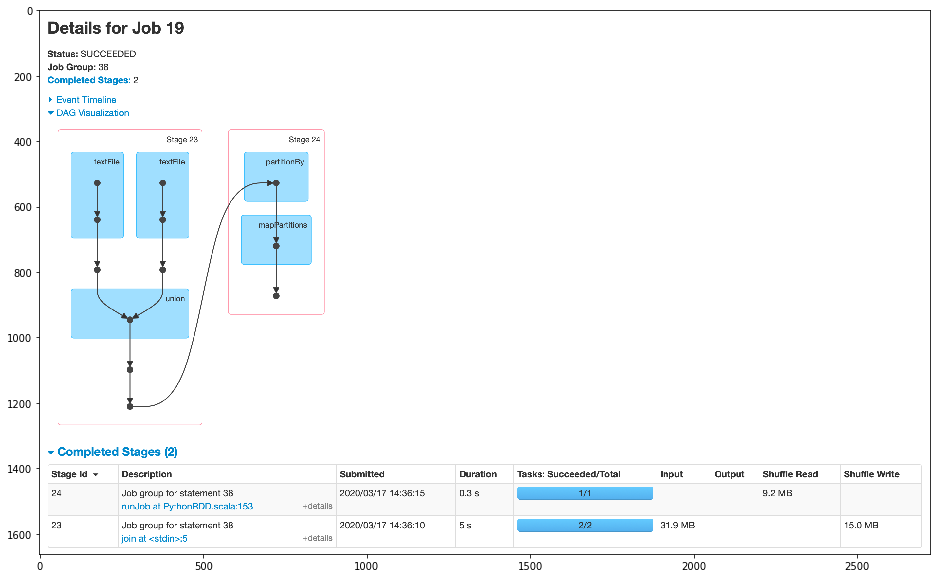

In [49]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()

# print(folder_pathway)

image_path = folder_pathway + "/Description Images/"
# plot the image
fig, ax1 = plt.subplots(figsize=(16,10))
image = mpimg.imread(image_path + 'Understanding DAG Visual 1.png')
plt.imshow(image);

### Taking a deeper look of what is happening: the image below.

The task that was executed in the first stage (Stage 38) gives a DAG Visualisation and its Event Timeline too.

- 1) The 2 textFile callouts were to extract the two different files that are departure_delays.csv and airport-codes.txt.
- 2) Once the map functions were completed, it proceeds to support the join function where Spark executes the UnionRDD and PairwiseRDD to perform the join as part of the union task.

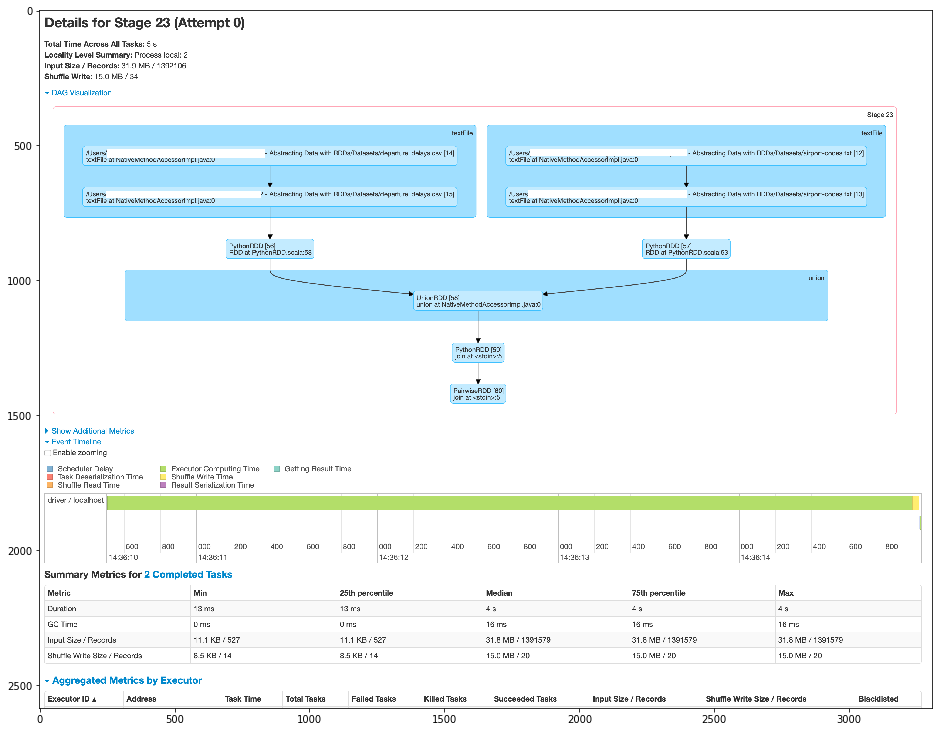

In [58]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()

# print(folder_pathway)

image_path = folder_pathway + "/Description Images/"
# plot the image
fig, ax1 = plt.subplots(figsize=(16,15))
image = mpimg.imread(image_path + 'Understanding DAG Visual 2.png')
plt.imshow(image);

### Next stage: 

The partitionBy and mapPartitions tasks would then shuffle and re-map the partitions before proceeding to give an output by using the take() function.

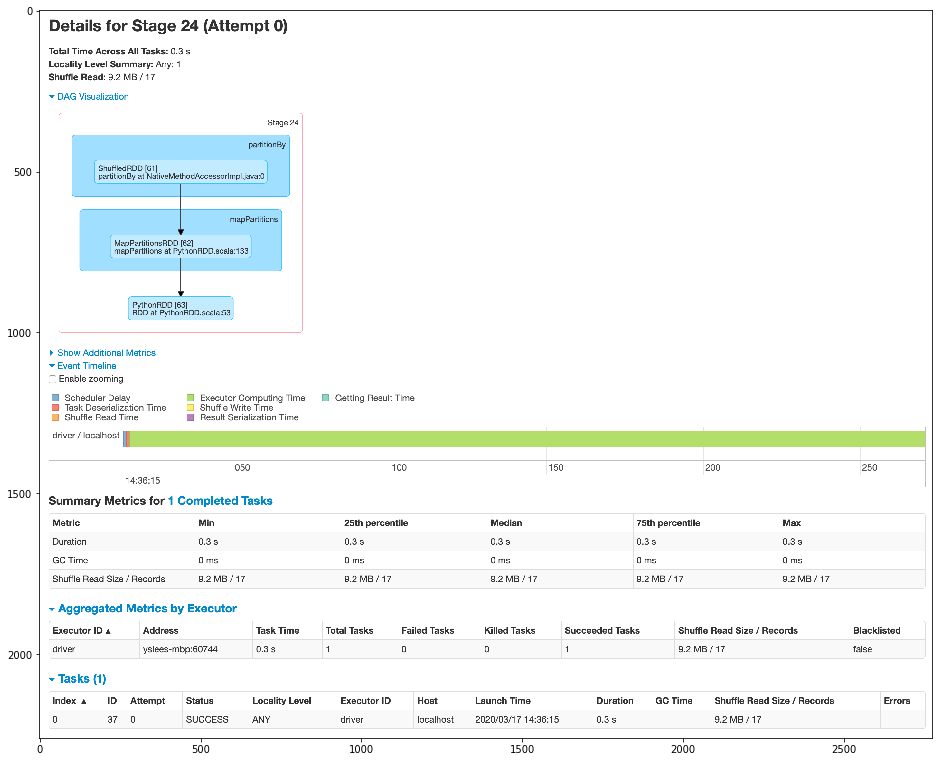

In [59]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()

# print(folder_pathway)

image_path = folder_pathway + "/Description Images/"
# plot the image
fig, ax1 = plt.subplots(figsize=(16,15))
image = mpimg.imread(image_path + 'Understanding DAG Visual 3.png')
plt.imshow(image);


## 5 More on RDD Actions:

An RDD Action would return aa value to the driver only after performing the computation on the dataset. These are typically done on the worker nodes.


## 5.1 Action type: .take()

This .take() function will return an arrau with the first "n" elements stated of the RDD.

In [39]:
# Example:
airports.take(50)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['City', 'State', 'Country', 'IATA'], ['Abbotsford', 'BC', 'Canada', 'YXX'], ['Aberdeen', 'SD', 'USA', 'ABR'], ['Abilene', 'TX', 'USA', 'ABI'], ['Akron', 'OH', 'USA', 'CAK'], ['Alamosa', 'CO', 'USA', 'ALS'], ['Albany', 'GA', 'USA', 'ABY'], ['Albany', 'NY', 'USA', 'ALB'], ['Albuquerque', 'NM', 'USA', 'ABQ'], ['Alexandria', 'LA', 'USA', 'AEX'], ['Allentown', 'PA', 'USA', 'ABE'], ['Alliance', 'NE', 'USA', 'AIA'], ['Alpena', 'MI', 'USA', 'APN'], ['Altoona', 'PA', 'USA', 'AOO'], ['Amarillo', 'TX', 'USA', 'AMA'], ['Anahim Lake', 'BC', 'Canada', 'YAA'], ['Anchorage', 'AK', 'USA', 'ANC'], ['Appleton', 'WI', 'USA', 'ATW'], ['Arviat', 'NWT', 'Canada', 'YEK'], ['Asheville', 'NC', 'USA', 'AVL'], ['Aspen', 'CO', 'USA', 'ASE'], ['Athens', 'GA', 'USA', 'AHN'], ['Atlanta', 'GA', 'USA', 'ATL'], ['Atlantic City', 'NJ', 'USA', 'ACY'], ['Augusta', 'GA', 'USA', 'AGS'], ['Augusta', 'ME', 'USA', 'AUG'], ['Austin', 'TX', 'USA', 'AUS'], ['Bagotville', 'PQ', 'Canada', 'YBG'], ['Baie-Comeau', 'PQ', 'Canada', 'Y

## 5.2 Action type: .collect()

This .collect() function will return all of the lements from the workers and drivers.

NOTE: Depending on the cluster setup and the size of the dataset, this can take a very long time as well as computationally taxing.

In [40]:
# Return all the airports' elements: filter it by WA State.
airports.filter(lambda c: c[1] == "WA").collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['Bellingham', 'WA', 'USA', 'BLI'], ['Moses Lake', 'WA', 'USA', 'MWH'], ['Pasco', 'WA', 'USA', 'PSC'], ['Pullman', 'WA', 'USA', 'PUW'], ['Seattle', 'WA', 'USA', 'SEA'], ['Spokane', 'WA', 'USA', 'GEG'], ['Walla Walla', 'WA', 'USA', 'ALW'], ['Wenatchee', 'WA', 'USA', 'EAT'], ['Yakima', 'WA', 'USA', 'YKM']]

## 5.3 Action type: .reduce()

The .reduce(f) action function would aggregate the elements of the RDD according to the function "f". This "f" function should therefore be commutative and associative so that it can be computed correctly and in parallel.

NOTE: this func. needs to be both associative and commutative, where for example, if there is a change in the order of elements, the operands does not change the results.

Source: 
- https://sciencing.com/associative-commutative-property-of-addition-multiplication-with-examples-13712459.html
- https://www.purplemath.com/modules/numbprop.htm

EXAMPLE: 

Associativity Rule -> (6 + 3) + 4 = 6 + (3 + 4)
Commutative Rule -> 6 + 3 + 4 = 4 + 3 + 6

EXAMPLE 2: 
- The RDD (with one partition only!) is: 

data_example = sc.parallelize([1, 2, 0.5, 0.1, 5, 0.2], 1) 

And reducing data to divide the current result by the subsequent one, we would expect a value of 10: \
works = data_example.reduce(lambda x, y: x / y) \
works = 10

- Partitioning the data into three partitions will produce an incorrect result: 

data_example = sc.parallelize([1, 2, .5, .1, 5, .2], 3) \
data_example.reduce(lambda x, y: x / y) \
output -> 0.004.

In [41]:
# Find the total flight delays: check between SEA (origin) and SFO (dest), next is to convert these delays column to integers and summarise them.

(
    flights
    .filter(lambda c: c[3] == "SEA" and c[4] == "SFO")
    .map(lambda c: int(c[1]))
    .reduce(lambda x, y: x + y)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

22293

## 5.4 Action type: .count()

The count() action function would return the number of elements in the RDD.

In [42]:
(
    flights
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0)
    .map(lambda row_idx: row_idx[0])
    .count()
)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1391578

## 5.5 Action type: .saveAsTextFile()

This action will save the RDD into a Text File.

NOTE: the data on each of the partition will be saved into a separate file. This can be seen as:
- /Temp_Save/airports/_SUCCESS
- /Temp_Save/airports/part-00000
- /Temp_Save/airports/part-00001

etc. 

In [43]:
savepath = os.getcwd()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
# Saves the data into a Text File:

airports.saveAsTextFile(savepath + "/Temp_Save/airports")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 5.6 Once again, understanding whats happening behind the scenes of a Spark Session:

Every Spark session will launch a web-based UI and by default it would be on http://localhost:4040.
Opening this link would show the following:

- A list of scheduler stages and its tasks.
- Summary of the RDD sizes and its memory usage.
- Environmental Information.
- Information about the running executors.

Further information and details can be found on: https://spark.apache.org/docs/latest/monitoring.html.

## 5.7 Example code for DAG visualisation:

In [45]:
(
    flights
    .zipWithIndex()
    .filter(lambda row_idx: row_idx[1] > 0)
    .map(lambda row_idx: row_idx[0])
    .map(lambda c: (c[3], int(c[1])))
    .reduceByKey(lambda x, y: x + y)
    .take(5)
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('ABE', 5113), ('ABI', 5128), ('ABQ', 64422), ('ABY', 1554), ('ACT', 392)]

## 5.8 DAG Visualisation:

These visualisations below shows the reduceByKey() action. This is a single job (in this case Job ID 25) that represents only the reduceByKey() part of the DAG as the previous .zipWithIndex() transformation is not included in this Job ID 25. This can be verified by taking a look at the "Completed Stages" section.

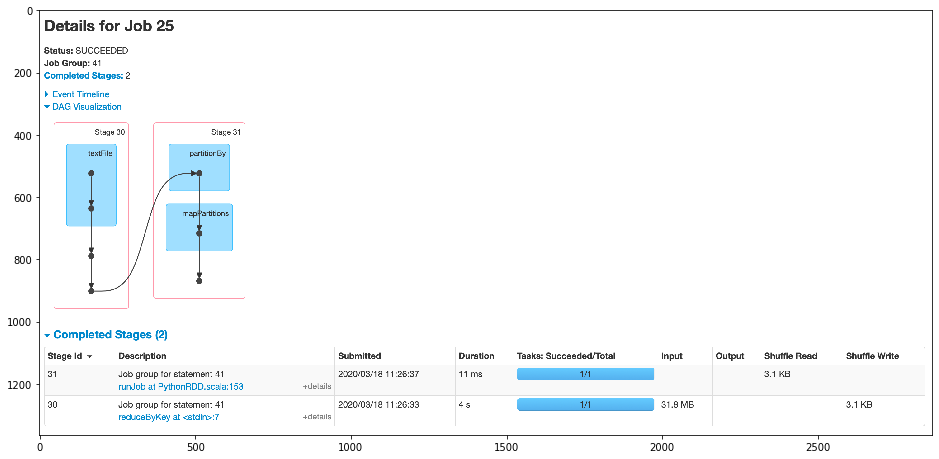

In [52]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()

# print(folder_pathway)

image_path = folder_pathway + "/Description Images/"
# plot the image
fig, ax1 = plt.subplots(figsize=(16,10))
image = mpimg.imread(image_path + 'Understanding DAG Visual 4.png')
plt.imshow(image);

### Taking a deeper look of what is happening: the image below.

The bulk of the task was executed in the first stage (Stage 30) where it extracts the data from the departure_delays.csv file and proceeds to reduceByKey(). This section can be made faster with greater partitions than 1. 

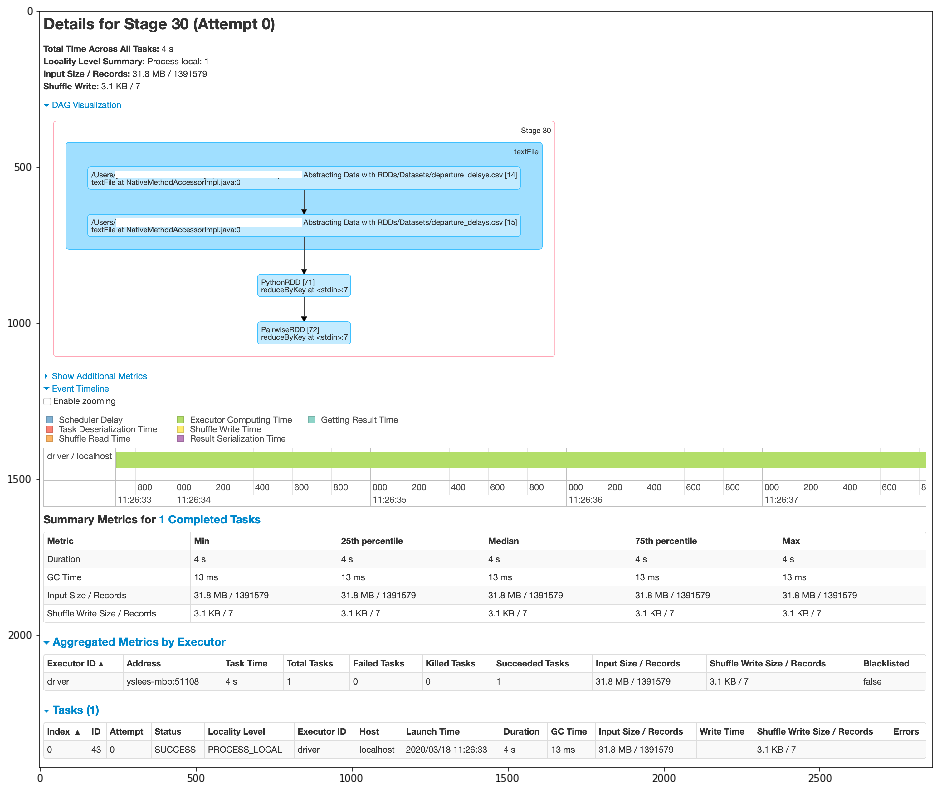

In [56]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()

# print(folder_pathway)

image_path = folder_pathway + "/Description Images/"
# plot the image
fig, ax1 = plt.subplots(figsize=(16,15))
image = mpimg.imread(image_path + 'Understanding DAG Visual 5.png')
plt.imshow(image);

### Next stage: 

The partitionBy and mapPartitions tasks would then shuffle and re-map the partition(s) before proceeding to give an output by using the take() function.

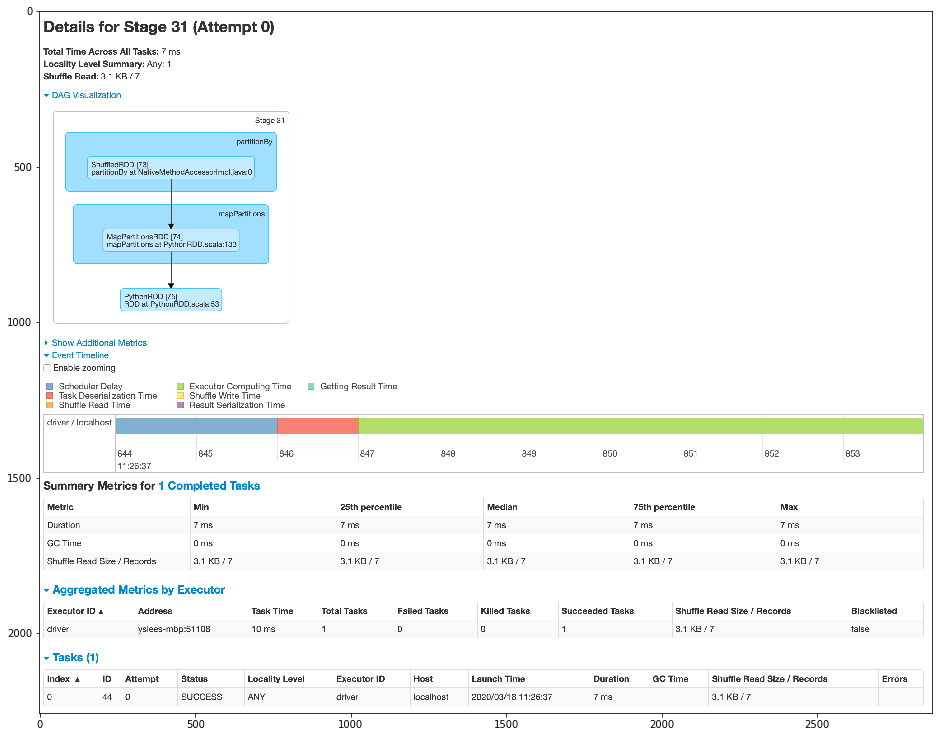

In [57]:
%%local

# Import the required library and set to use ggplot:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder_pathway = os.getcwd()

# print(folder_pathway)

image_path = folder_pathway + "/Description Images/"
# plot the image
fig, ax1 = plt.subplots(figsize=(16,15))
image = mpimg.imread(image_path + 'Understanding DAG Visual 6.png')
plt.imshow(image);

## 6 Disadvantages of using RDD:

In general, RDDs allows for higher flexibility like performing functional operators such as map, reduce and shuffle provding a wide variety of possible transformations on the data. 

__One issue is__: avoid using GroupByKey on larger datasets.
- where it incurs a lot of unnessary data to being transferred over the network and may cause out of disk problems.

ref: https://umbertogriffo.gitbook.io/apache-spark-best-practices-and-tuning/avoid_groupbykey_when_performing_an_associative_re/avoid-groupbykey-when-performing-an-associative-reductiove-operation

__Another is__: RDDs are slow.
- because when a PySpark program executes using RDDs it will incur a large overhead to execute the job. This happens due to a lot of context switching amd communications overhead betwen Python and JVM when PySpark is trying to distribute the processing on multiple workers.